In [258]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [134]:
file = pd.read_csv(r"E:\assignment\final\final19.csv")
file['Date'] = pd.to_datetime(file['Date'])

file['year'] = file['Date'].dt.year
file['month'] = file['Date'].dt.month

In [163]:
file1 = file.drop(['Date'], axis=1)

In [256]:
file1

,House_Price_Index,Interest_Rate,No_of_property_Introduced,PPI,Income,Unemployment,Working_Pop,CPI,population,subsidy,...,Labour_Participation_Rate,House_Supply,personal_saving_rate,property tax,Real_m2,Velocity_m2,Urban_cpi,Government_Exp,year,month
0,128.461,1.24,1654,144.400,10710.4,5.8,185635346.4,182.600,290107933,25.930,...,66.4,4.0,5.3,77737,3178.9,1.915,182.900,3744.177,2003,1
1,129.355,1.26,1688,145.200,10674.0,5.9,185869692.3,183.600,290107933,25.930,...,66.4,4.5,5.2,77737,3181.2,1.915,183.400,3744.177,2003,2
2,130.148,1.25,1638,145.200,10696.5,5.9,186085118.2,183.900,290107933,25.930,...,66.3,4.1,4.9,77737,3187.3,1.915,184.200,3744.177,2003,3
3,130.884,1.26,1662,145.900,10752.7,6.0,186470754.0,183.200,290107933,25.930,...,66.4,4.1,5.0,56873,3219.9,1.901,184.000,3808.760,2003,4
4,131.735,1.26,1733,145.800,10832.0,6.1,186649078.0,182.900,290107933,25.930,...,66.4,3.9,5.3,56873,3258.2,1.901,184.600,3808.760,2003,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,301.473,2.33,1355,342.753,16161.4,3.7,207370651.0,295.320,333287557,48.021,...,62.3,8.7,3.2,125187,7334.4,1.202,303.919,8894.032,2022,8
236,299.353,2.56,1438,336.464,16184.9,3.5,207453580.5,296.539,333287557,48.021,...,62.3,9.7,3.0,125187,7258.8,1.202,306.129,8894.032,2022,9
237,298.873,3.08,1348,333.796,16223.5,3.7,207431164.7,297.987,333287557,48.021,...,62.2,9.7,3.0,290310,7192.7,1.234,307.881,9175.833,2022,10
238,298.269,3.78,1543,330.369,16229.6,3.6,207521914.2,298.598,333287557,48.021,...,62.2,9.4,3.3,290310,7166.6,1.234,309.328,9175.833,2022,11


# Statical Tests

In [263]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   House_Price_Index          240 non-null    float64
 1   Interest_Rate              240 non-null    float64
 2   No_of_property_Introduced  240 non-null    int64  
 3   PPI                        240 non-null    float64
 4   Income                     240 non-null    float64
 5   Unemployment               240 non-null    float64
 6   Working_Pop                240 non-null    float64
 7   CPI                        240 non-null    float64
 8   population                 240 non-null    int64  
 9   subsidy                    240 non-null    float64
 10  Inflation                  240 non-null    float64
 11  Annual Change              240 non-null    float64
 12  GDP                        240 non-null    int64  
 13  Mortgage_Rate              240 non-null    float64

In [356]:
file1.describe()

,House_Price_Index,Interest_Rate,No_of_property_Introduced,PPI,Income,Unemployment,Working_Pop,CPI,population,subsidy,...,Labour_Participation_Rate,House_Supply,personal_saving_rate,property tax,Real_m2,Velocity_m2,Urban_cpi,Government_Exp,year,month
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,2.400000e+02,240.000000,...,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,180.657238,1.301625,1201.716667,212.851467,13493.480833,6.012083,2.001512e+08,230.023112,3.139536e+08,34.677450,...,64.024167,6.137917,5.922083,123788.95000,4770.789167,1.626825,232.286837,6137.495212,2012.500000,6.500000
std,41.254187,1.578512,423.857641,44.566715,1837.485256,2.034118,6.171480e+06,27.475017,1.343623e+07,6.006483,...,1.614940,1.952217,3.545351,50628.72914,1328.524422,0.268508,30.789816,1614.746928,5.778332,3.459267
min,128.461000,0.050000,520.000000,144.400000,10674.000000,3.500000,1.856353e+08,182.600000,2.901079e+08,25.930000,...,60.100000,3.300000,1.400000,56873.00000,3178.900000,1.128000,182.900000,3744.177000,2003.000000,1.000000
25%,148.123000,0.120000,839.000000,184.275000,12115.575000,4.575000,1.962127e+08,211.433250,3.033783e+08,29.785000,...,62.800000,4.800000,4.500000,89864.75000,3550.125000,1.457750,212.759250,4977.587250,2007.750000,3.750000
50%,172.495000,0.400000,1181.500000,207.450000,12999.350000,5.400000,2.018248e+08,231.658500,3.149688e+08,33.544500,...,63.550000,5.600000,5.600000,111478.00000,4515.950000,1.584500,224.931500,5870.763000,2012.500000,6.500000
75%,197.457750,2.000000,1440.000000,224.525000,14820.075000,7.350000,2.055396e+08,248.068500,3.255511e+08,37.877250,...,65.900000,7.200000,6.425000,143945.50000,5581.300000,1.909750,254.710500,6717.372500,2017.250000,9.250000
max,304.724000,5.260000,2245.000000,353.015000,20422.600000,14.700000,2.075245e+08,298.990000,3.332876e+08,48.021000,...,66.500000,12.200000,32.000000,290310.00000,7671.900000,2.017000,311.629000,11058.298000,2022.000000,12.000000


# Assumption check 

# Check Whether is a Linear relationship between input and output column

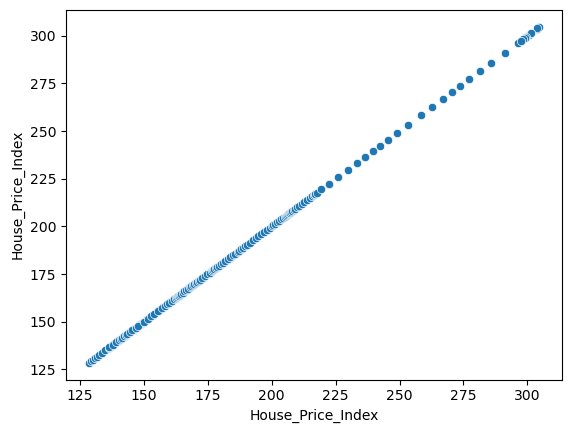

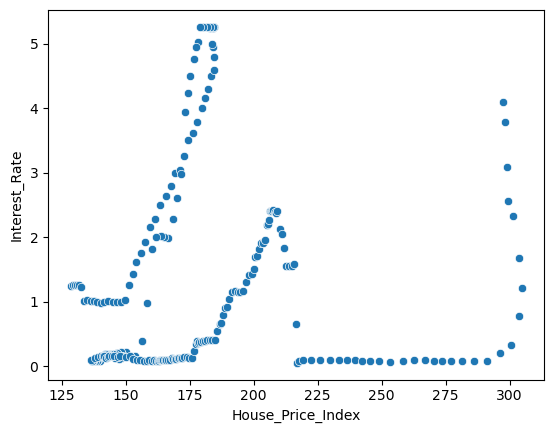

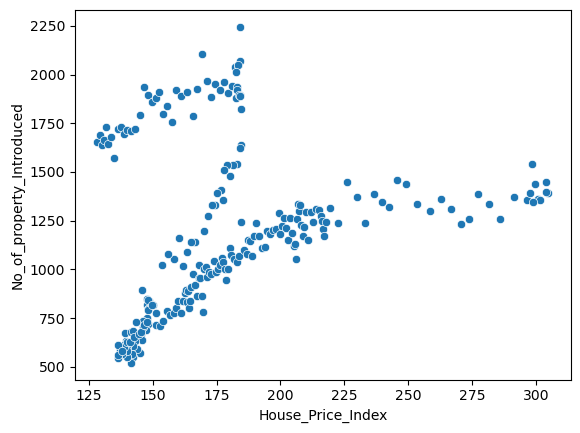

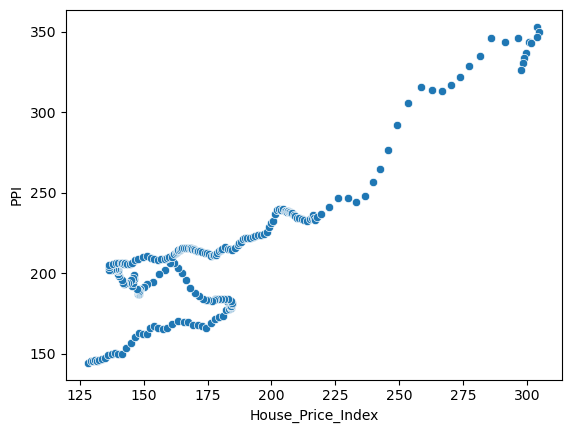

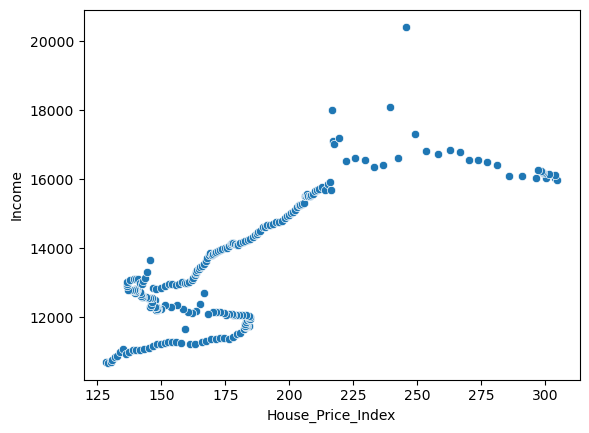

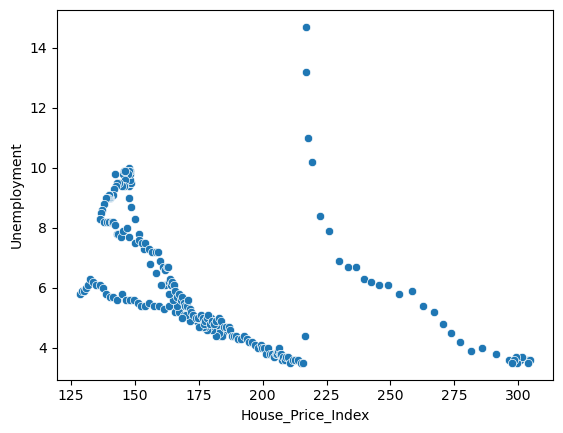

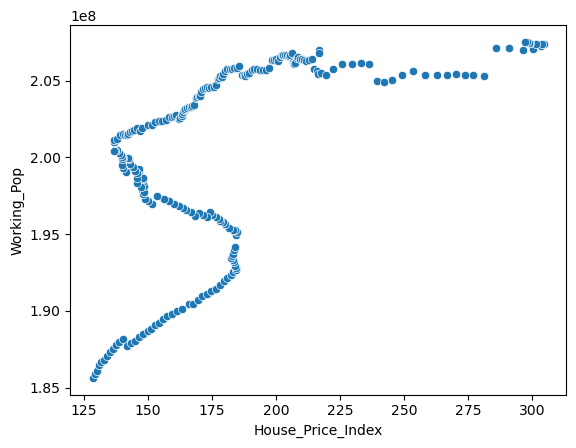

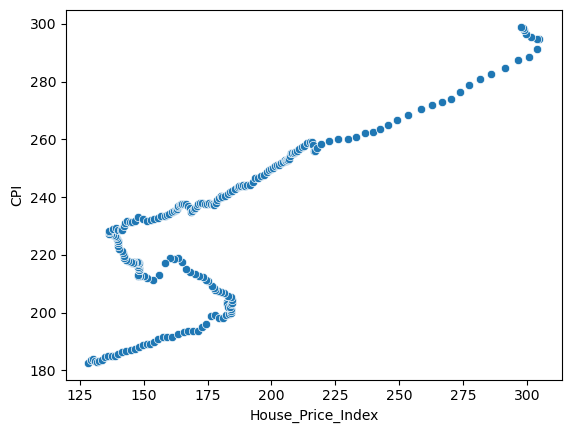

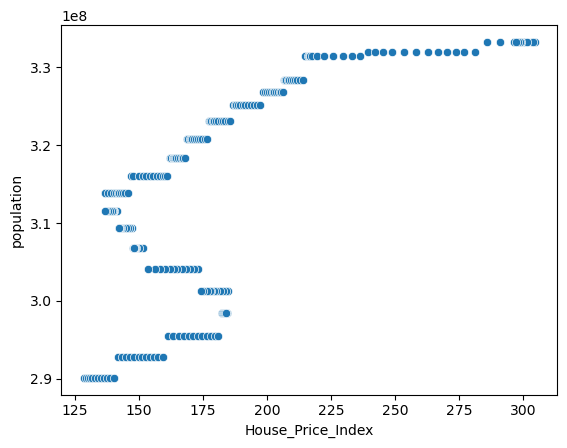

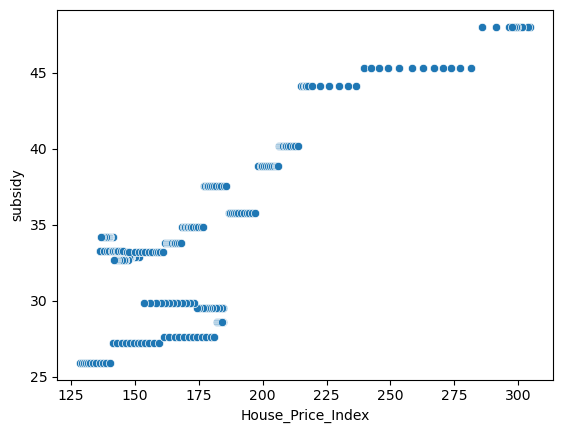

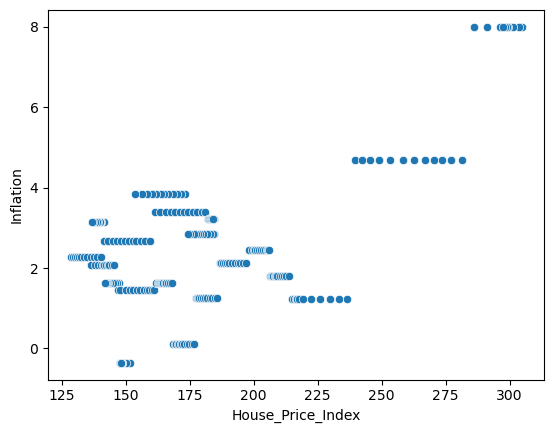

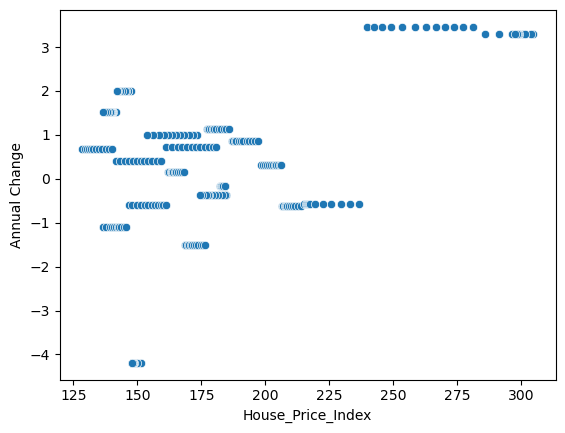

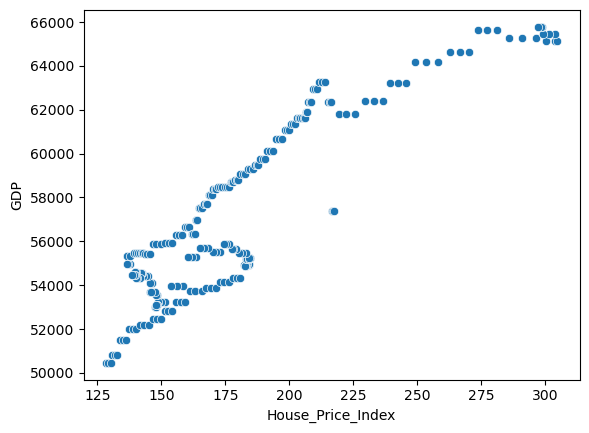

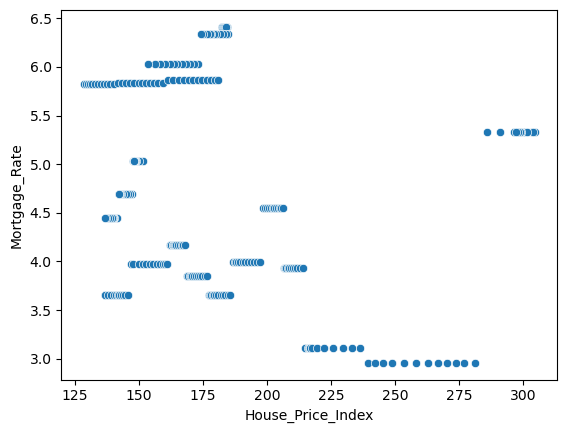

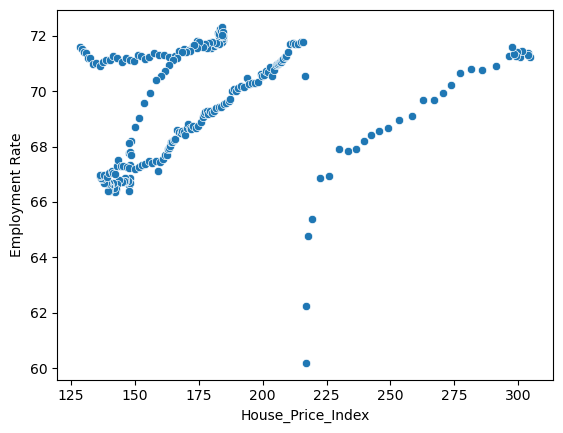

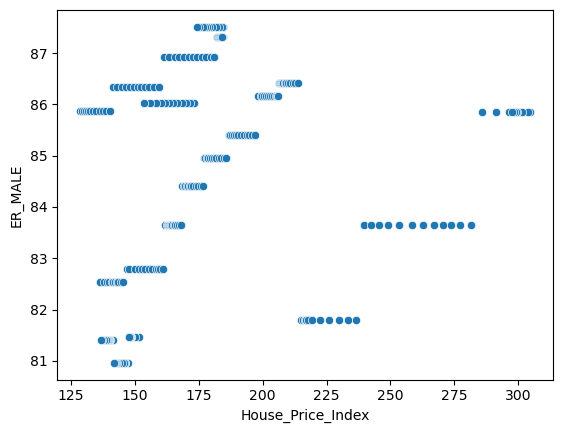

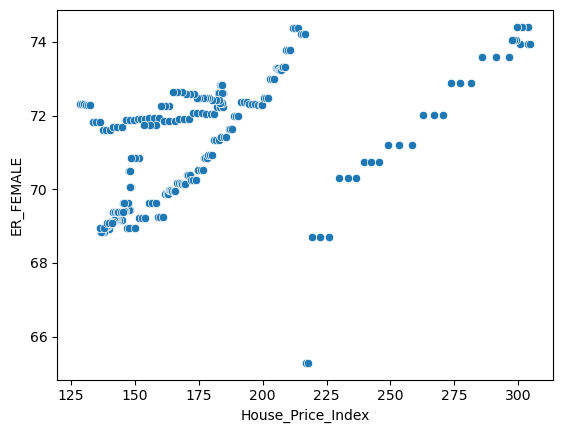

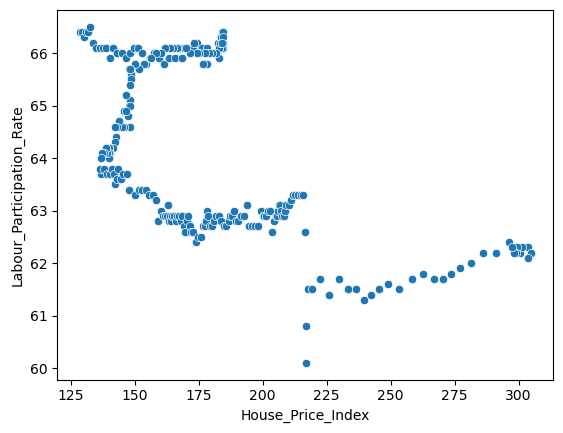

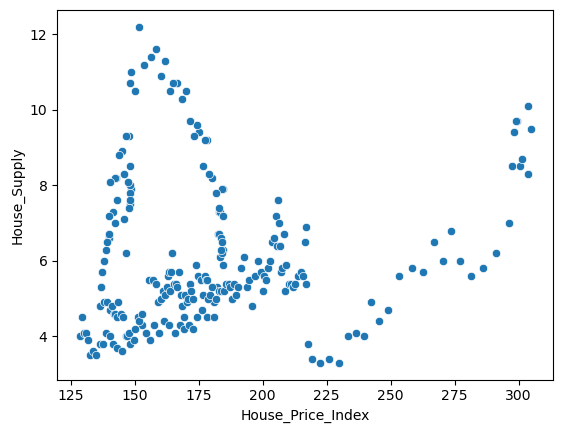

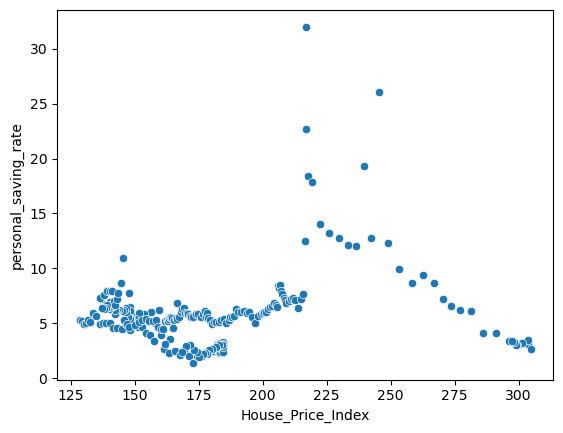

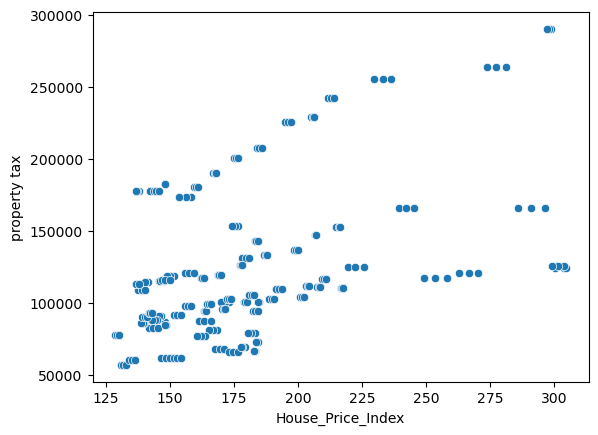

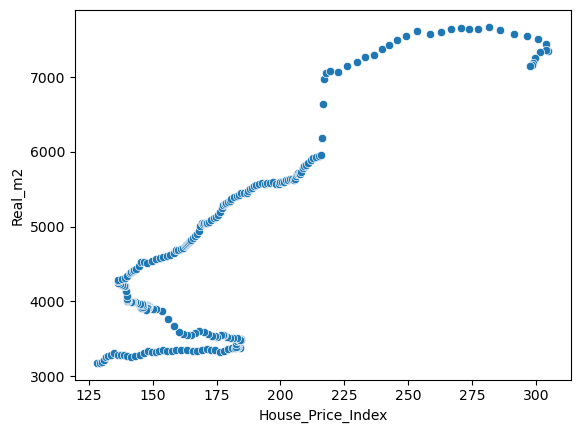

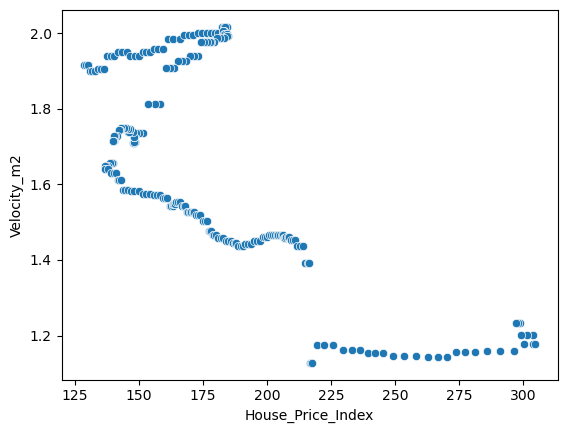

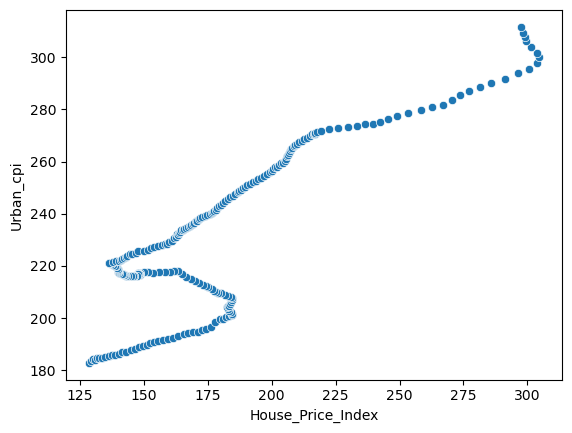

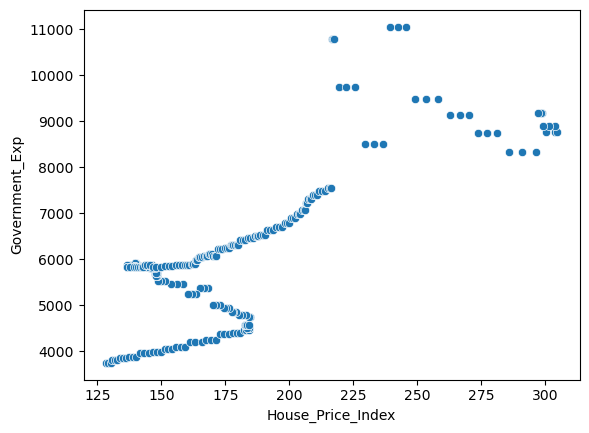

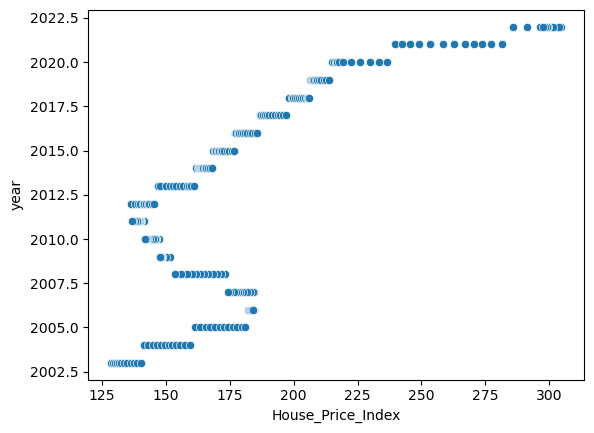

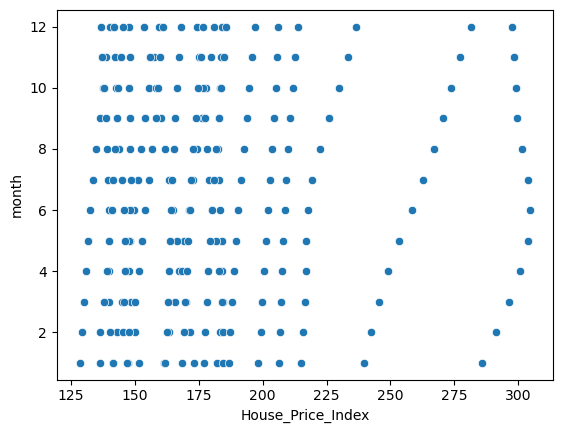

In [165]:
for i in file1:
    sns.scatterplot(data=file1, x='House_Price_Index', y=i)
    plt.show()

# Multicollinearity check

C:\Users\ravin\AppData\Local\Temp\ipykernel_14800\738317289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(file.corr(), annot=True)


<Axes: >

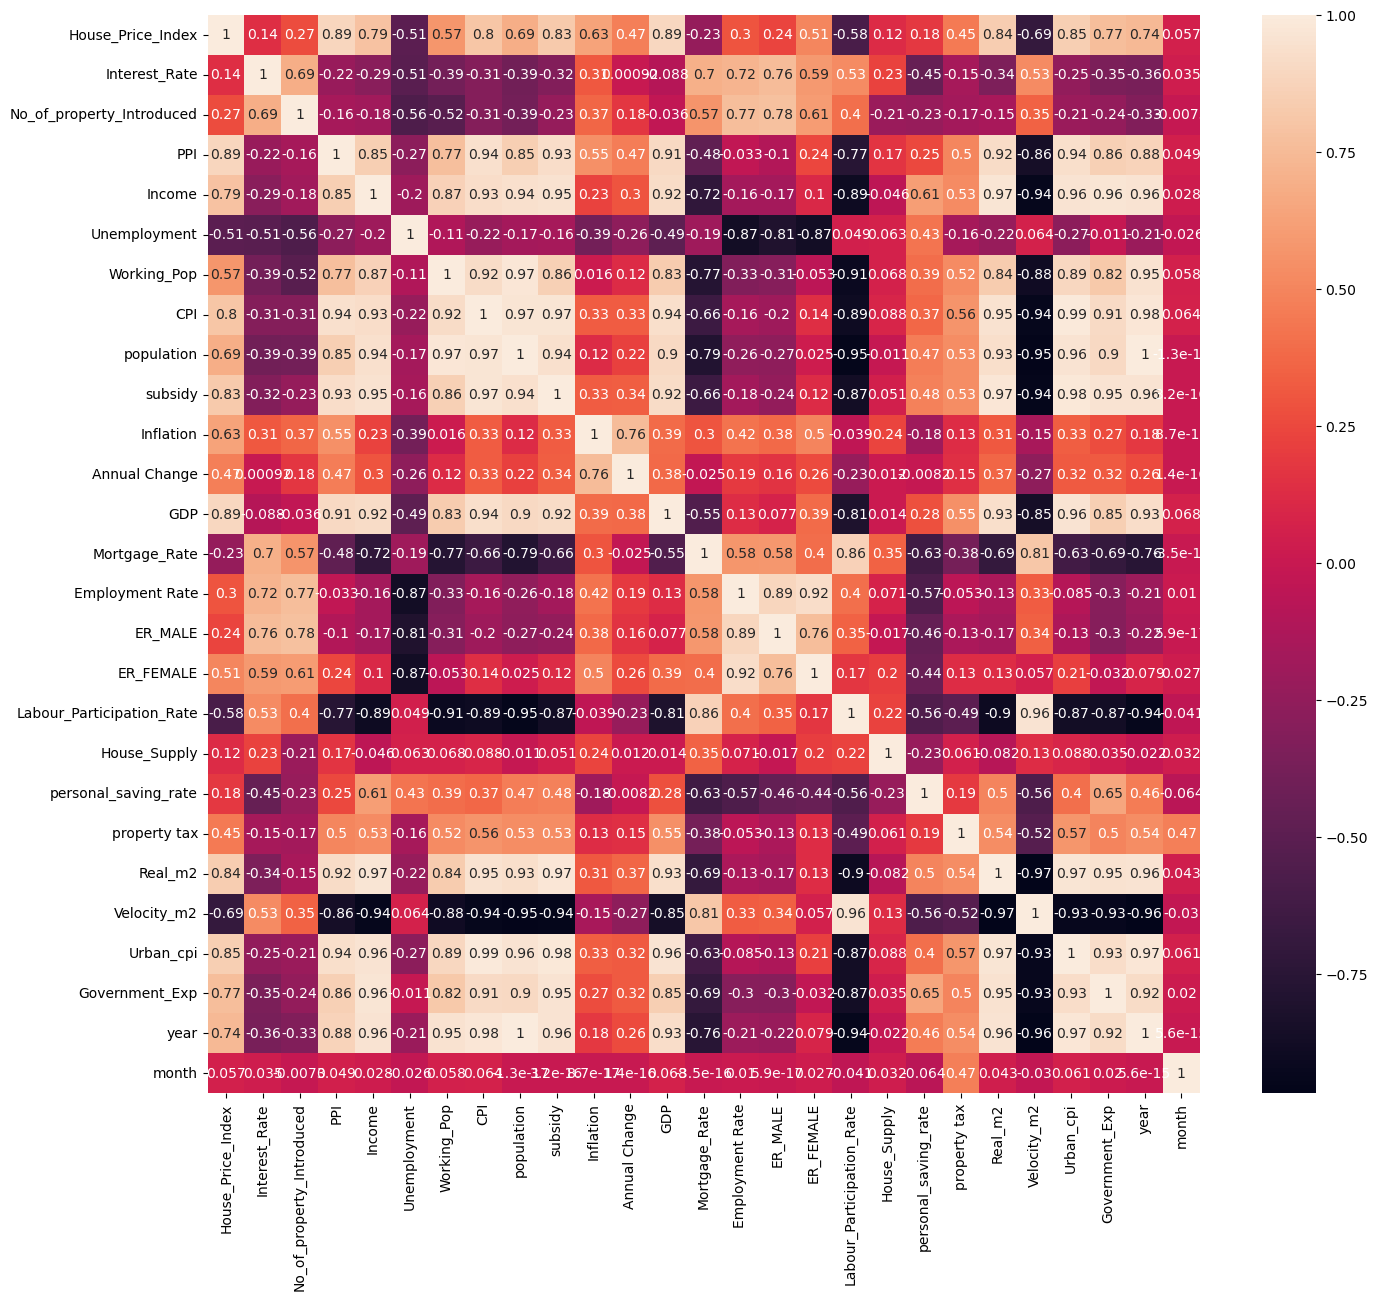

In [168]:
plt.figure(figsize=(16,14))
sns.heatmap(file.corr(), annot=True)

In [201]:
cor = file1.corr()

In [202]:
threshold = 0.85


selected_features = set()

for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            colname = cor.columns[i]
            selected_features.add(colname)


selected_features_list = list(selected_features)
    

In [207]:
columns_not_selected = file1.columns[~file1.columns.isin(selected_features_list)]

data = file1[columns_not_selected]

In [208]:
data

,House_Price_Index,Interest_Rate,No_of_property_Introduced,Unemployment,Inflation,Annual Change,Mortgage_Rate,House_Supply,personal_saving_rate,property tax,month
0,128.461,1.24,1654,5.8,2.2701,0.68,5.82698,4.0,5.3,77737,1
1,129.355,1.26,1688,5.9,2.2701,0.68,5.82698,4.5,5.2,77737,2
2,130.148,1.25,1638,5.9,2.2701,0.68,5.82698,4.1,4.9,77737,3
3,130.884,1.26,1662,6.0,2.2701,0.68,5.82698,4.1,5.0,56873,4
4,131.735,1.26,1733,6.1,2.2701,0.68,5.82698,3.9,5.3,56873,5
...,...,...,...,...,...,...,...,...,...,...,...
235,301.473,2.33,1355,3.7,8.0028,3.30,5.32750,8.7,3.2,125187,8
236,299.353,2.56,1438,3.5,8.0028,3.30,5.32750,9.7,3.0,125187,9
237,298.873,3.08,1348,3.7,8.0028,3.30,5.32750,9.7,3.0,290310,10
238,298.269,3.78,1543,3.6,8.0028,3.30,5.32750,9.4,3.3,290310,11


<Axes: >

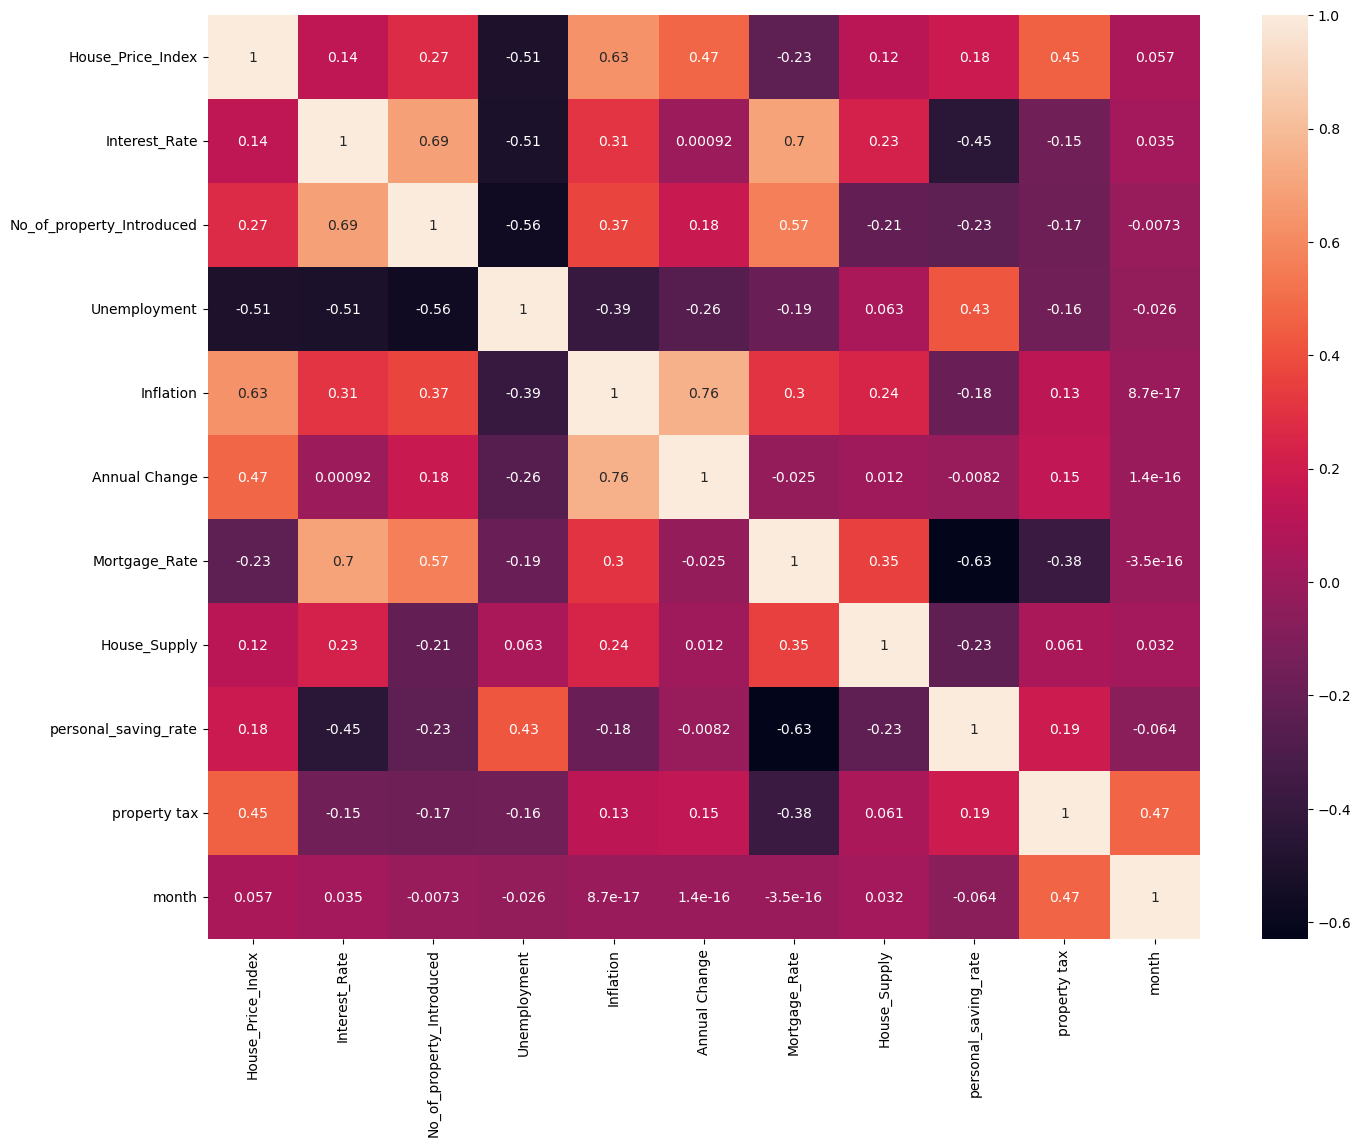

In [209]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True)

# Outliers detection and removal 

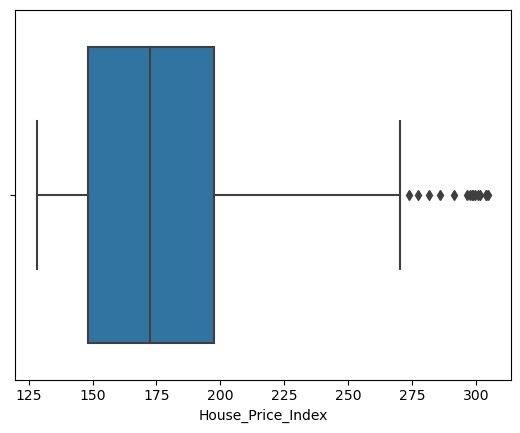

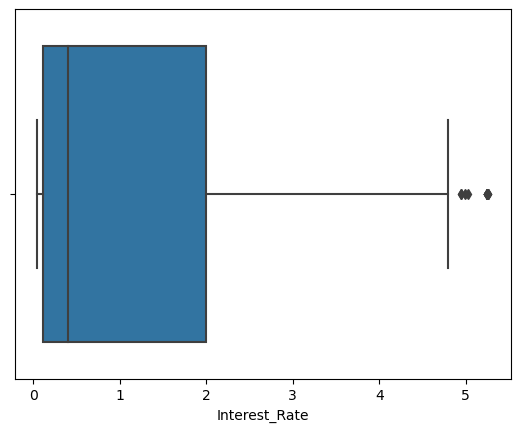

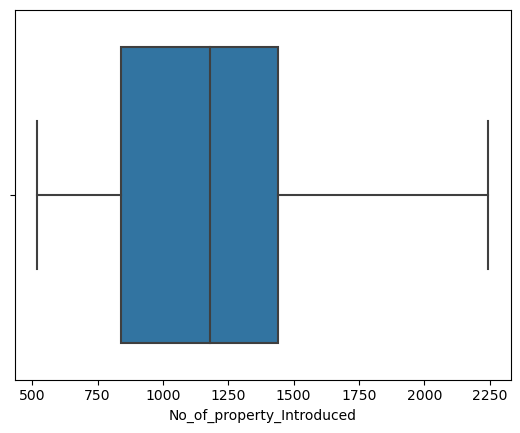

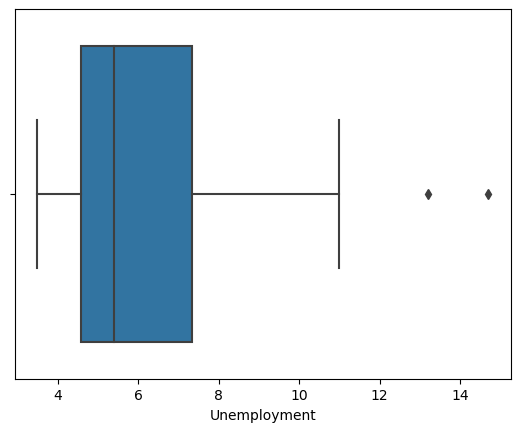

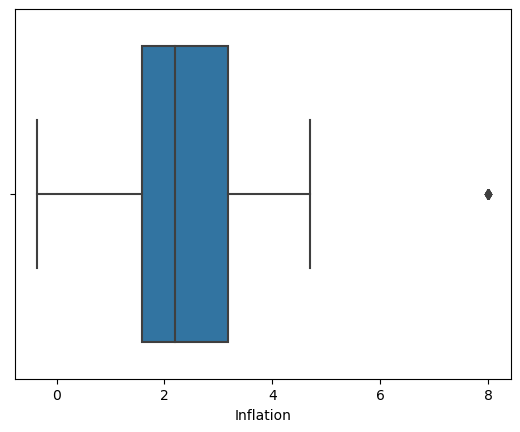

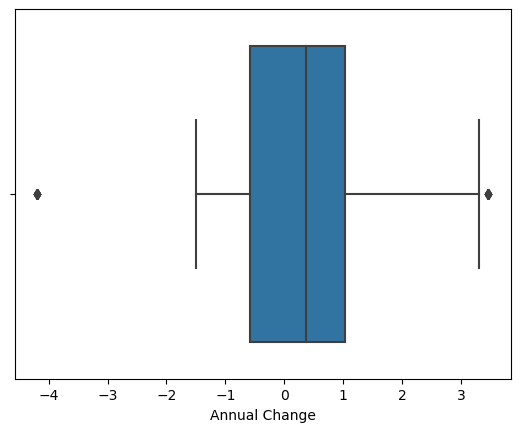

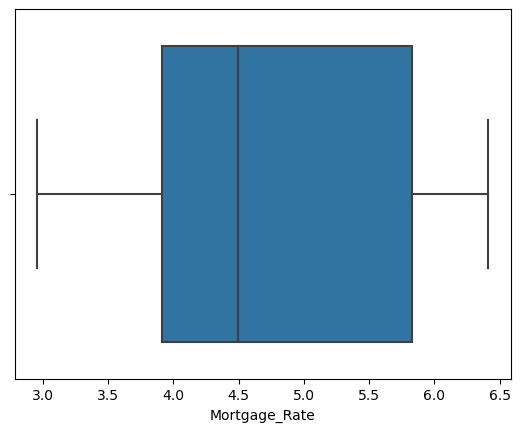

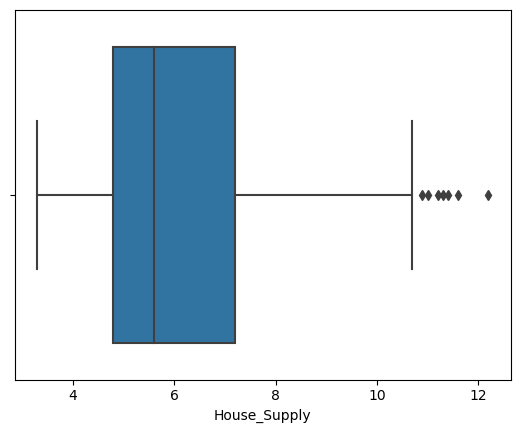

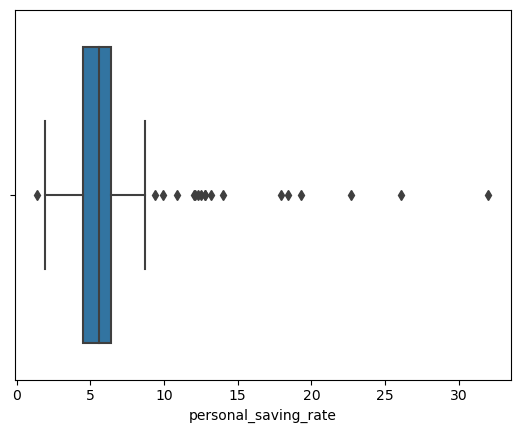

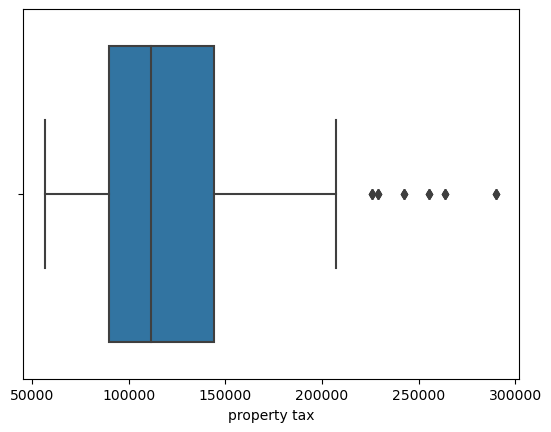

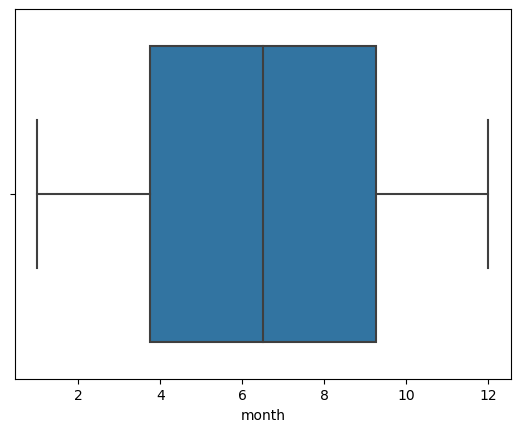

In [262]:
for i in data:
    sns.boxplot(data=data, x=i)
    plt.show()

In [359]:
data1 = data[data['House_Price_Index'] <= 280]
data0 = data1[data1['personal_saving_rate'] <= 15]
data2 = data0.reset_index().drop(['index'], axis=1)

In [360]:
data2

,House_Price_Index,Interest_Rate,No_of_property_Introduced,Unemployment,Inflation,Annual Change,Mortgage_Rate,House_Supply,personal_saving_rate,property tax,month
0,128.461,1.24,1654,5.8,2.2701,0.68,5.82698,4.0,5.3,77737,1
1,129.355,1.26,1688,5.9,2.2701,0.68,5.82698,4.5,5.2,77737,2
2,130.148,1.25,1638,5.9,2.2701,0.68,5.82698,4.1,4.9,77737,3
3,130.884,1.26,1662,6.0,2.2701,0.68,5.82698,4.1,5.0,56873,4
4,131.735,1.26,1733,6.1,2.2701,0.68,5.82698,3.9,5.3,56873,5
...,...,...,...,...,...,...,...,...,...,...,...
216,262.820,0.10,1361,5.4,4.6979,3.46,2.95769,5.7,9.4,120777,7
217,266.845,0.09,1312,5.2,4.6979,3.46,2.95769,6.5,8.7,120777,8
218,270.377,0.08,1232,4.8,4.6979,3.46,2.95769,6.0,7.2,120777,9
219,273.725,0.08,1259,4.5,4.6979,3.46,2.95769,6.8,6.6,263873,10


# scaling 

In [361]:
x = data2.drop(['House_Price_Index'], axis=1)
y = data2['House_Price_Index']

In [362]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

scaled = pd.DataFrame(rs.fit_transform(x), columns=column)

In [363]:
scaled

,Interest_Rate,No_of_property_Introduced,Unemployment,Inflation,Annual Change,Mortgage_Rate,House_Supply,personal_saving_rate,property tax,month
0,0.441489,0.764706,0.107143,0.082742,0.232704,0.724523,-0.75,-0.176471,-0.634184,-1.000000
1,0.452128,0.815988,0.142857,0.082742,0.232704,0.724523,-0.50,-0.235294,-0.634184,-0.833333
2,0.446809,0.740573,0.142857,0.082742,0.232704,0.724523,-0.70,-0.411765,-0.634184,-0.666667
3,0.452128,0.776772,0.178571,0.082742,0.232704,0.724523,-0.70,-0.352941,-1.064032,-0.500000
4,0.452128,0.883861,0.214286,0.082742,0.232704,0.724523,-0.80,-0.176471,-1.064032,-0.333333
...,...,...,...,...,...,...,...,...,...,...
216,-0.164894,0.322775,-0.035714,1.517612,1.981132,-0.782885,0.10,2.235294,0.252544,0.000000
217,-0.170213,0.248869,-0.107143,1.517612,1.981132,-0.782885,0.50,1.823529,0.252544,0.166667
218,-0.175532,0.128205,-0.250000,1.517612,1.981132,-0.782885,0.25,0.941176,0.252544,0.333333
219,-0.175532,0.168929,-0.357143,1.517612,1.981132,-0.782885,0.65,0.588235,3.200668,0.500000


# Correlation

<Axes: >

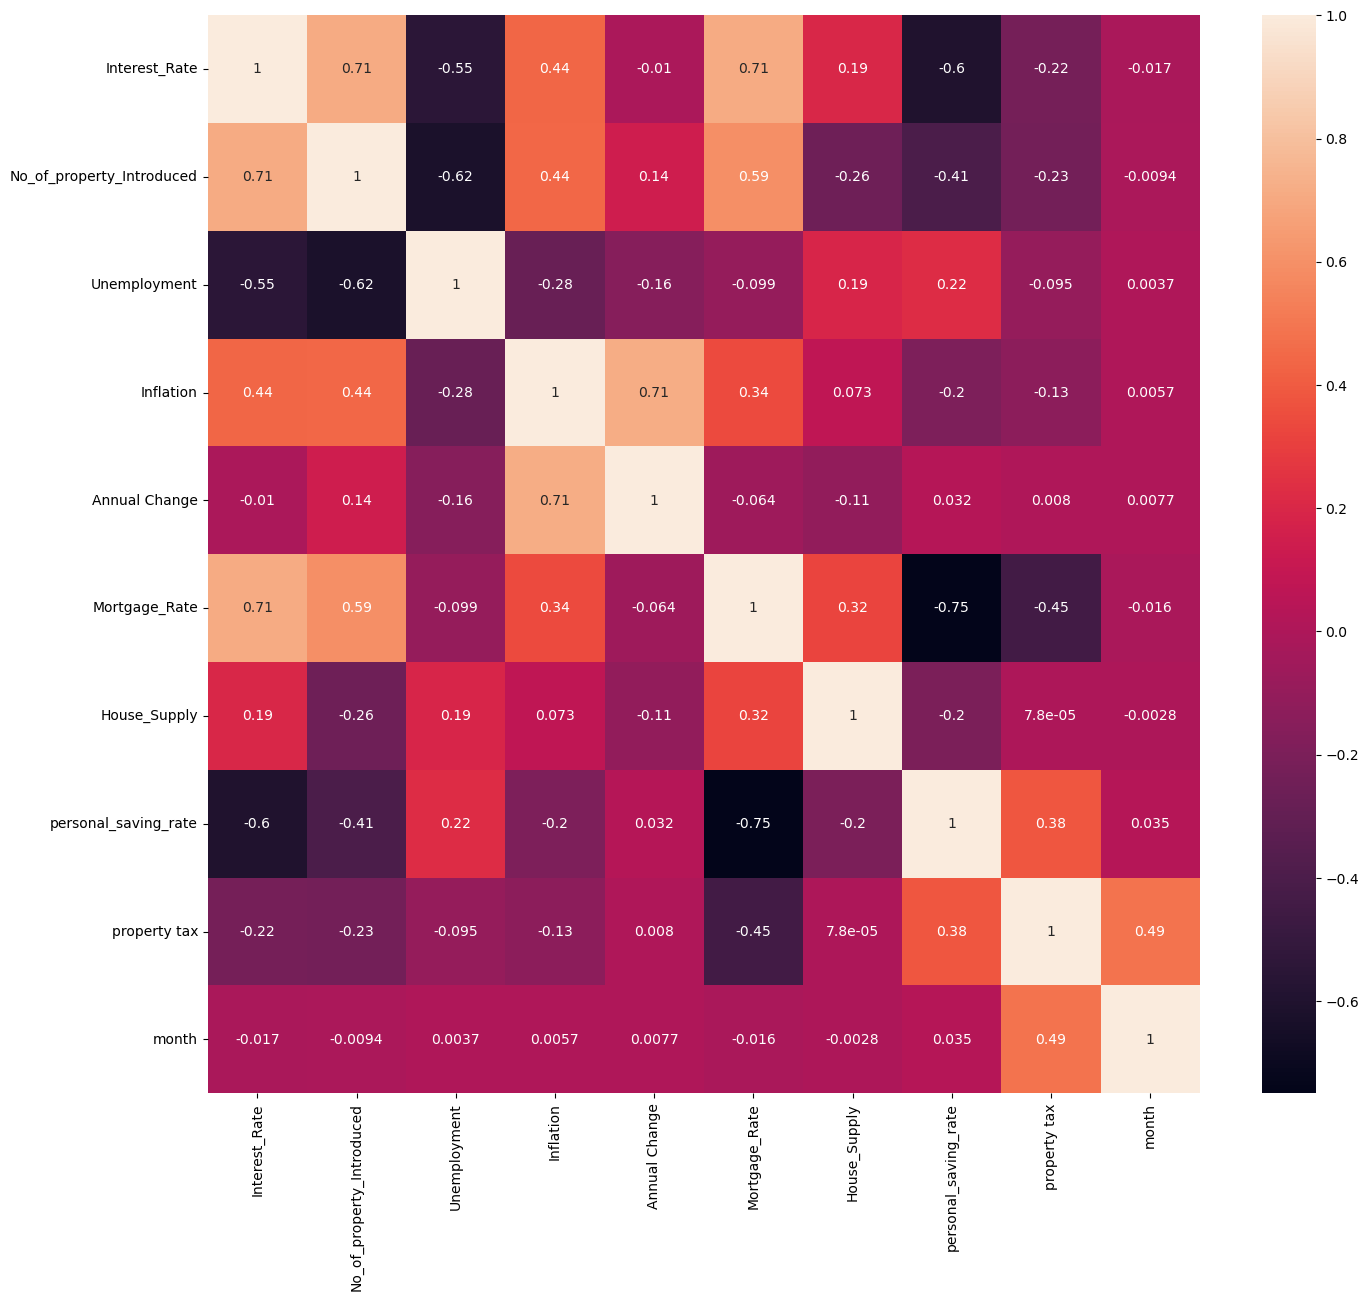

In [364]:
plt.figure(figsize=(16,14))
sns.heatmap(scaled.corr(), annot=True)

In [365]:
scaled.describe()

,Interest_Rate,No_of_property_Introduced,Unemployment,Inflation,Annual Change,Mortgage_Rate,House_Supply,personal_saving_rate,property tax,month
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,0.483946,0.062768,0.191176,0.023648,-0.111016,0.132342,0.277602,0.003460,0.238694,-0.077677
std,0.848278,0.661469,0.658101,0.692696,0.945216,0.552328,0.954122,1.286464,0.979689,0.576803
min,-0.186170,-0.945701,-0.714286,-1.469031,-2.830189,-0.782885,-1.100000,-2.470588,-1.064032,-1.000000
25%,-0.154255,-0.496229,-0.285714,-0.393203,-0.572327,-0.269042,-0.350000,-0.529412,-0.418538,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.845745,0.503771,0.714286,0.606797,0.427673,0.730958,0.650000,0.470588,0.581462,0.500000
max,2.579787,1.656109,1.607143,1.517612,1.981132,1.032535,3.350000,4.941176,3.200668,0.833333


# Train Test Split

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=24)

In [368]:
x_train.shape

(176, 10)

In [369]:
y_train.shape

(176,)

# Model 

In [370]:
from sklearn.linear_model import LinearRegression

In [371]:
lr = LinearRegression()

In [372]:
lr.fit(x_train, y_train)

LinearRegression()

In [373]:
train_pred = lr.predict(x_train)

In [374]:
test_pred = lr.predict(x_test)

# Assumption (residuals normal distribution)

In [375]:
from scipy.stats import shapiro
import numpy as np

In [376]:
res = train_pred - y_train

<Axes: ylabel='Frequency'>

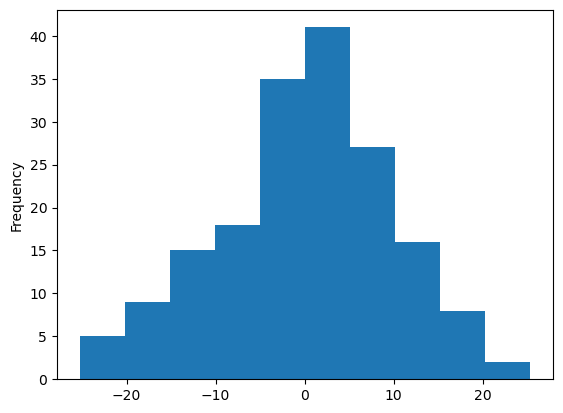

In [377]:
res.plot(kind='hist')

In [378]:
statistic, p_value = shapiro(res)

alpha = 0.05
if p_value > alpha:
    print("Gaussian (fail to reject H0)")
else:
    print("not look Gaussian (reject H0)")

Gaussian (fail to reject H0)


# Assumption Homosedasticity 

In [379]:
sd = pd.DataFrame()

sd['dep'] = y_train
sd['resid'] = res

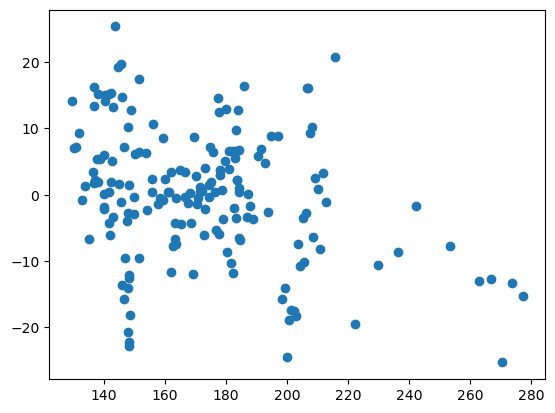

In [380]:
plt.scatter(sd['dep'], sd['resid'])

# Assumption  autocorrelation(Durbin-Watson test)

In [381]:
durbin_ = sm.stats.durbin_watson(res)
durbin_

1.989750055567387

# Accuracy check--------------------------------------------------

In [382]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# r2_score

In [383]:
acc = r2_score(train_pred, y_train)
acc

0.8832061229329274

In [384]:
acct = r2_score(test_pred, y_test)
acct

0.8905504472707525

# mean_squared_error

In [385]:
accm = mean_squared_error(train_pred, y_train)
accm

95.07169892546003

In [386]:
acctm = mean_squared_error(test_pred, y_test)
acctm

103.50325647999124

# mean_absolute_error

In [387]:
accma = mean_absolute_error(train_pred, y_train)
accma

7.5371449361832985

In [388]:
acca = mean_absolute_error(test_pred, y_test)
acca

8.043409646658155

# Cross Validation 

In [389]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [390]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(lr,scaled, y, cv=kf)

In [391]:
cross_val_results

array([0.88420572, 0.86002032, 0.85658903, 0.81263493, 0.90882697])

In [392]:
cross_val_results.mean()

0.8644553958662909

# Gradient Boosting

In [393]:
from sklearn.ensemble import GradientBoostingRegressor

In [394]:
gbr = GradientBoostingRegressor(learning_rate=0.1)

In [395]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [396]:
predict_train = gbr.predict(x_train)
predict_test = gbr.predict(x_test)

# Accuracy check

# R2_score

In [397]:
accg = r2_score(predict_train, y_train)
acctg = r2_score(predict_test, y_test)
print('train',accg, 'test', acctg)

train 0.9987196049313991 test 0.9758182514399932


# Mean_squred_error

In [398]:
accm = mean_squared_error(predict_train, y_train)
accm = mean_squared_error(predict_test, y_test)
print('train',accm, 'test', accm)

train 23.64170819535334 test 23.64170819535334


# mean_absolute_error

In [399]:
accma = mean_absolute_error(predict_train, y_train)
accma = mean_absolute_error(predict_test, y_test)
print('train',accma, 'test', accma)

train 3.302403434070066 test 3.302403434070066


# Cross Validation score

In [400]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(gbr,scaled, y, cv=kf)

In [401]:
cross_val_results

array([0.99117423, 0.9875801 , 0.98312377, 0.9946526 , 0.97993346])

In [402]:
cross_val_results.mean()

0.9872928312998044